## Synthetic Data (1000 datapoints, SOM map 12x4)

In [1]:
#generating 3D synthetic data data
def f(X):
    return np.sin(X) + np.random.normal(scale=0.3, size=len(X))

resolution = 1000 # how many datapoints to generate
cycles = 4 # how many sine cycles
length = np.pi * 2 * cycles

X1 = np.arange(0, length, length / resolution)
X2 = np.arange(0, length, length / resolution)
X3 = np.arange(0, length, length / resolution)

synth = np.concatenate(([f(X1)],[f(X2)],[f(X3)]), axis=0).T;

NameError: name 'np' is not defined

In [ ]:
import numpy as np
import holoviews as hv
hv.extension('bokeh')
 
synth       = np.load('datasets\synthetic\sinusoidal.npy')
codebook    = np.load('datasets\synthetic\map.npy')

#2-D synusoidal signal
hv.Points(synth[:,0])*hv.Points(synth[:,1])*hv.Points(synth[:,2]).opts(width=900,height=300)

In [ ]:
import somoclu
from pysomvis import PySOMVis
hv.extension("bokeh")

n_rows, n_columns = 12, 4
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
som.train(synth, epochs = 1000)

a = PySOMVis(weights=som.codebook, input_data=synth)
a._mainview

## Climat Data (12 418 days (~35 years), 5 features)

In [ ]:
import datetime
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler

data = pd.read_excel('datasets\climate\climate_draw_data.xlsx', index_col=0)
data = data.reset_index()

def calc(row):
    return datetime.datetime(int(row[0]), int(row[1]), int(row[2]))

data['time'] = data.apply(calc, axis=1)
data.drop(data.columns[[0, 1, 2, 5, 7, 9]], axis=1, inplace=True)

data['RH2M'] = data.groupby(['RH2M']).apply(lambda x: x[['RH2M']].interpolate())
data['PS'] = data.groupby(['PS']).apply(lambda x: x[['PS']].interpolate())
data['T2M'] = data.groupby(['T2M']).apply(lambda x: x[['T2M']].interpolate())
data['WS50M'] = data.groupby(['WS50M']).apply(lambda x: x[['WS50M']].interpolate())
data['ALLSKY_SFC_LW_DWN'] = data.groupby(['ALLSKY_SFC_LW_DWN']).apply(lambda x: x[['ALLSKY_SFC_LW_DWN']].interpolate())

data = data.set_index(keys='time')
robustscaler = RobustScaler()
for i in range(data.shape[1]):
    x_scaled = robustscaler.fit_transform(data.iloc[:,i].values.reshape(-1,1))
    data.iloc[:,i] = x_scaled
year = np.array(data.loc['1985':'2020'])

In [ ]:
import somoclu
from pysomvis import PySOMVis

n_rows, n_columns = 19, 3
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False, initialization='pca')
som.train(year, epochs = 10000)

#35 years visualisation
Climat_Data = PySOMVis(weights=som.codebook, input_data=year)
Climat_Data._mainview

## Climat Data (trained SOM map19x3)

In [ ]:
import numpy as np
from pysomvis import PySOMVis

evaldata = np.load('datasets\climate\climate (35 years).npy')
codebook = np.load('datasets\climate\map.npy')

#visualization
Climat_Data2 = PySOMVis(weights=codebook, input_data=evaldata)
Climat_Data2._mainview

## 4 Data Sets, trained by SOMToolbox (http://www.ifs.tuwien.ac.at/dm/somtoolbox/index.html)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
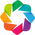

Column
    [0] Column
        [0] Column
            [0] Row(margin=(5, 10), width=700)
                [0] StaticText(value='<b></b>')
                [1] Select(options=OrderedDict([('Component P...]), value=0)
                [2] Select(options=OrderedDict([('PiYG', ...]), value='jet')
                [3] Button(name='↶')
                [4] Button(name='↷')
                [5] Button(name='↔')
                [6] Button(name='↕')
                [7] Checkbox(name='interpolation')
        [1] Row
            [0] Column
                [0] Bokeh(figure)
            [1] Row
                [0] Column
                    [0] Column(margin=(5, 10), name='Component Planes')
                        [0] StaticText(value='<b>Component Planes</b>')
                        [1] IntSlider(end=3, name=np.str_('sep_length'))
                    [1] Str(str)
    [1] Column
        [0] Row()

In [1]:
from pysomvis import PySOMVis
from SOMToolBox_Parse import SOMToolBox_Parse
import numpy as np

dataset = 'iris' #iris, chainlink, 10clusters, BostonHousing
inputdata = SOMToolBox_Parse('datasets/'+dataset+'/'+dataset+'.vec').read_weight_file()
components = SOMToolBox_Parse('datasets/'+dataset+'/'+dataset+'.tv').read_weight_file()
weights = SOMToolBox_Parse('datasets/'+dataset+'/'+dataset+'.wgt.gz').read_weight_file()
classinfo = SOMToolBox_Parse('datasets/'+dataset+'/'+dataset+'.cls').read_weight_file()

#visualization
pysomviz = PySOMVis(weights=weights['arr'], m=weights['ydim'], n=weights['xdim'],
                     dimension=weights['vec_dim'], input_data=inputdata['arr'], classes_names=classinfo['classes_names'], 
                    classes=classinfo['arr'][:,1], component_names=components['arr'][:,1])
pysomviz._mainview